In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Wine Quality dataset
df = pd.read_csv('winequality.csv')


### Data Exploration :: 1. Overview of the Dataset

In [31]:
# Display the first few rows of the dataset
df.head()




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [32]:
# Summary statistics
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [33]:

# Info about columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [34]:
df=df.drop_duplicates()

In [35]:
df.shape

(5320, 14)

### 2. Data Visualization :: Univariate Analysis

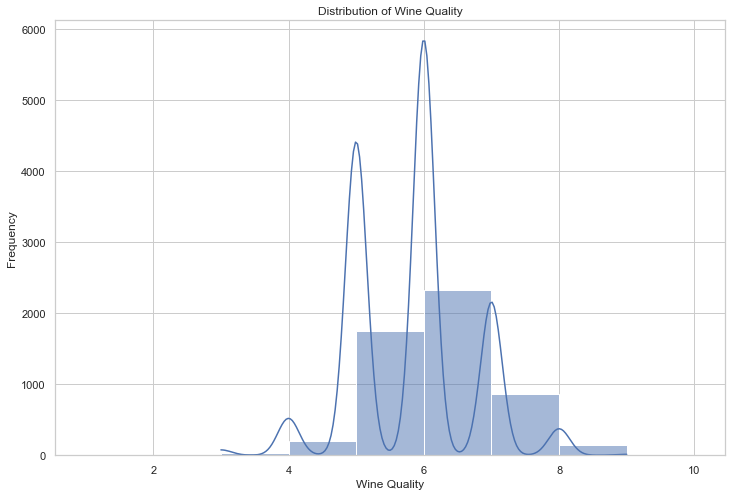

In [36]:
# Histograms for numerical columns
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
sns.histplot(df['quality'], bins=range(1, 11), kde=True)
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')
plt.show()




In [37]:
df['quality'].value_counts()

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

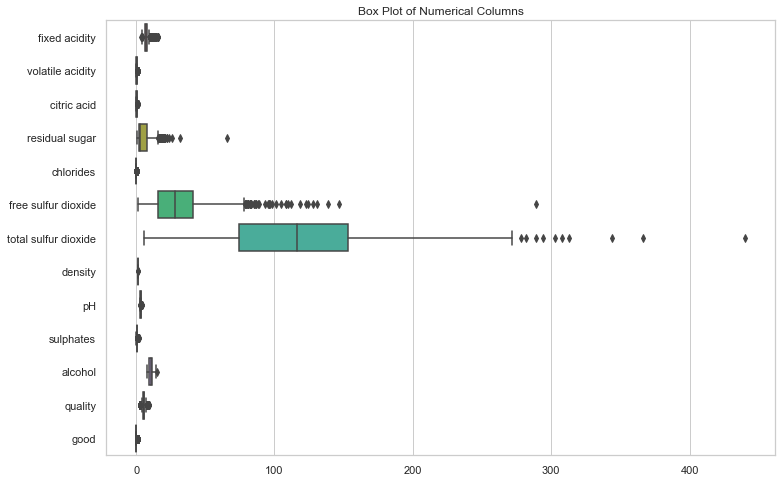

In [38]:
# Box plot for each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title('Box Plot of Numerical Columns')
plt.show()

### Bivariate Analysis

In [39]:
numerical_cols=df.select_dtypes(include=['int64', 'float64'])

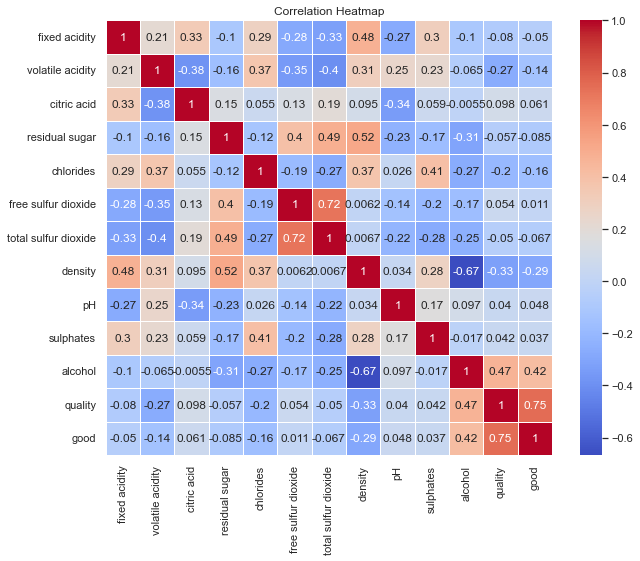

In [40]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



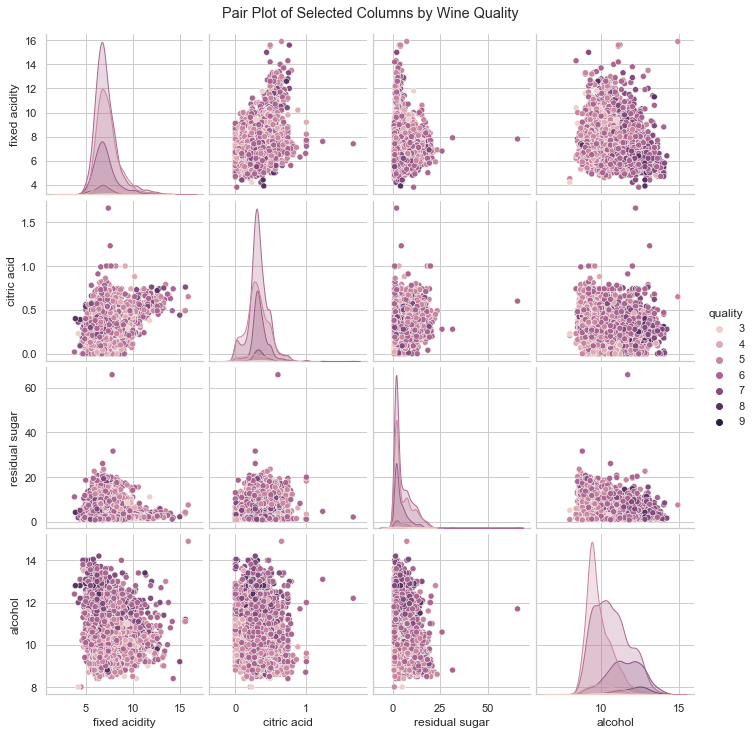

In [11]:
# Pair plot for selected columns
sns.pairplot(data=df, vars=['fixed acidity', 'citric acid', 'residual sugar', 'alcohol'], hue='quality')
plt.suptitle('Pair Plot of Selected Columns by Wine Quality', y=1.02)
plt.show()



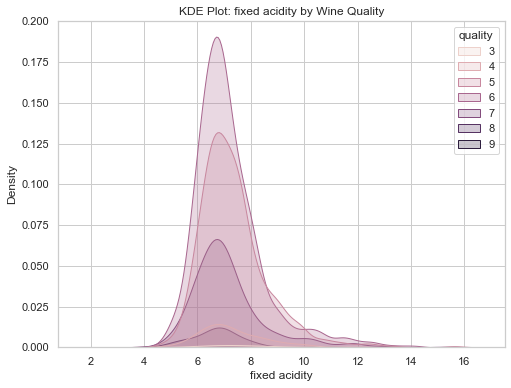

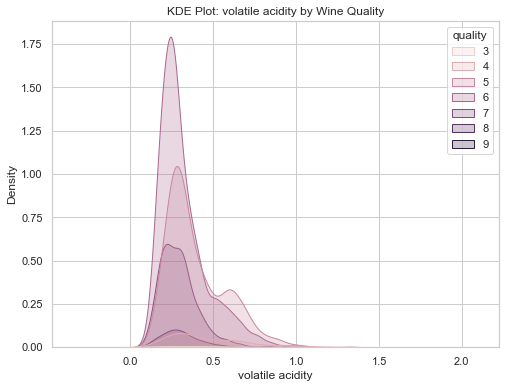

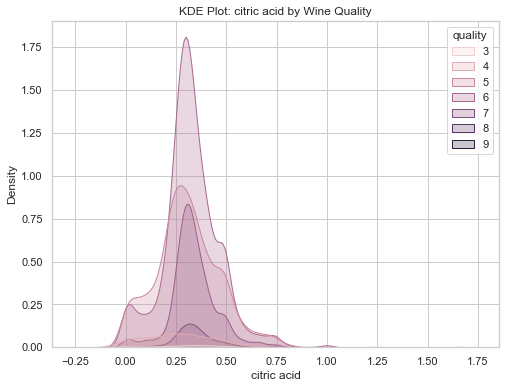

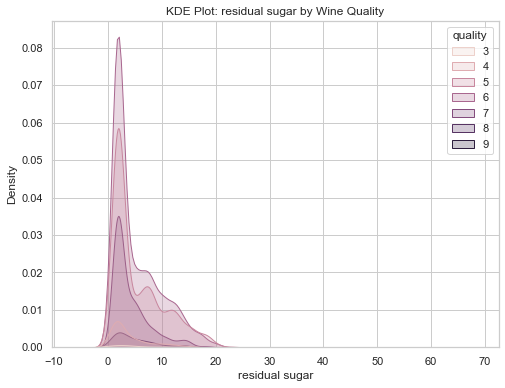

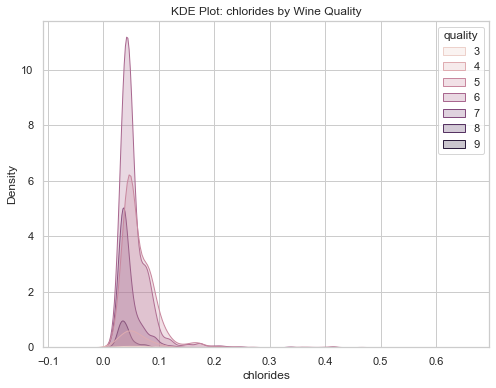

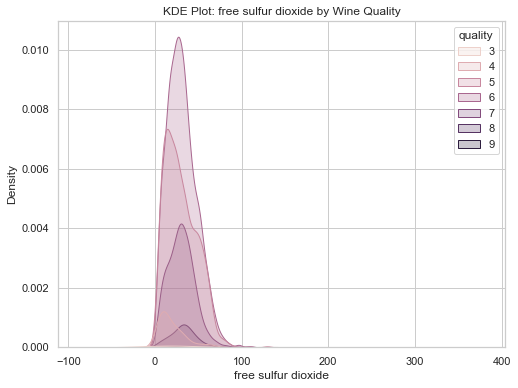

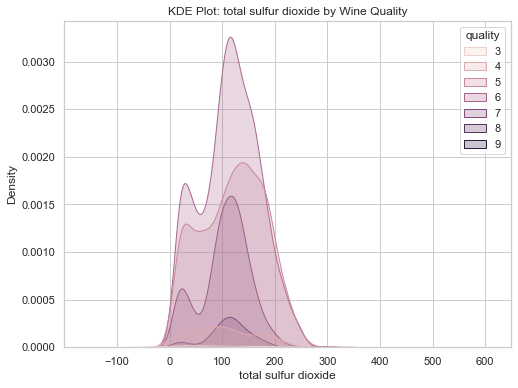

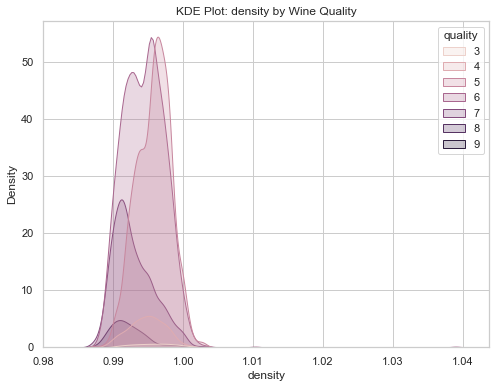

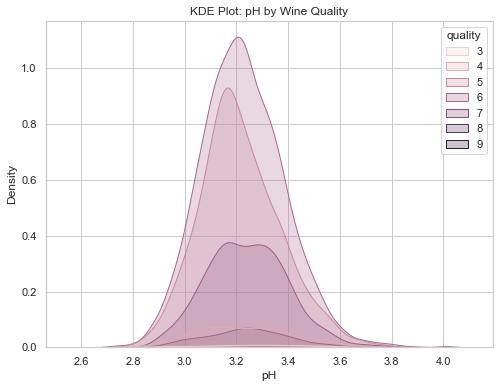

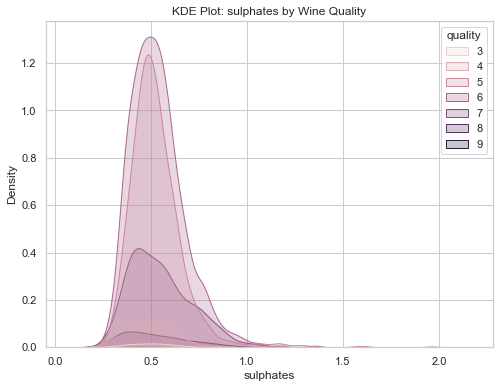

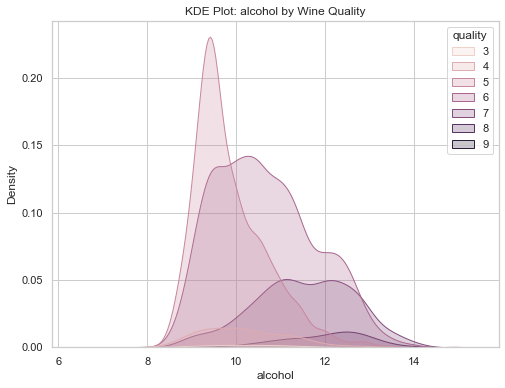

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


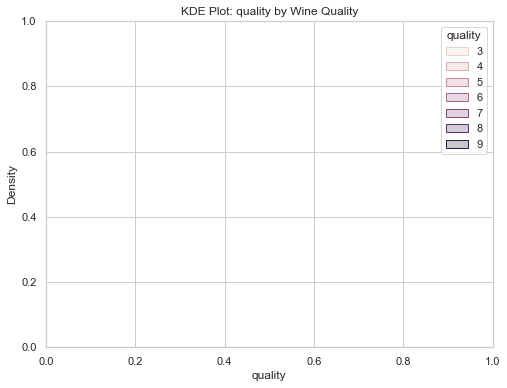

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


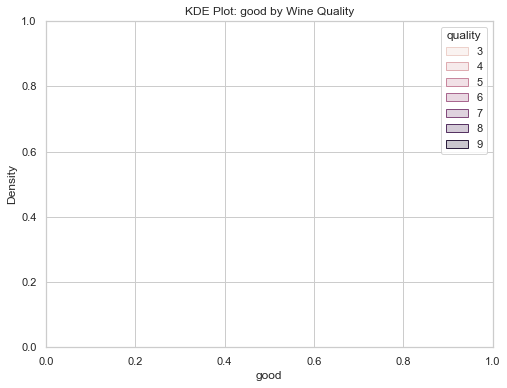

In [12]:
# KDE plot for numerical columns grouped by wine quality
for column in df.columns[:-1]:  # Exclude the 'quality' column
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=column, hue='quality', fill=True)
    plt.title(f'KDE Plot: {column} by Wine Quality')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


Conclusion and Insights

Quality Distribution: The wine quality in the dataset is mostly centered around 5 and 6, with fewer instances of extremely low 

or high-quality wines.

Correlations: Some chemical properties (e.g., alcohol content) show correlations with wine quality. Positive correlations 

indicate that higher values of certain properties are associated with better quality wines.

In [13]:
# Assuming 'data' is your Wine Quality dataset DataFrame
cross_tab = pd.crosstab(df['quality'], df['color'], margins=True, margins_name='Total')
cross_tab


color,red,white,Total
quality,,,
3,10,20,30
4,53,153,206
5,577,1175,1752
6,535,1788,2323
7,167,689,856
8,17,131,148
9,0,5,5
Total,1359,3961,5320


In [14]:
# Assuming 'data' is your Wine Quality dataset DataFrame

# Grouping by 'quality' and calculating mean for numerical columns
quality_grouped = df.groupby('quality').agg(['min','max','mean','median'])



In [15]:
# Display the grouped data
quality_grouped


fixed acidity                        volatile acidity         \
                  min   max      mean median              min    max   
quality                                                                
3                 4.2  11.8  7.853333   7.45             0.17  1.580   
4                 4.6  12.5  7.304369   7.00             0.11  1.130   
5                 4.5  15.9  7.333248   7.10             0.10  1.330   
6                 3.8  14.3  7.169027   6.90             0.08  1.040   
7                 4.2  15.6  7.122021   6.80             0.08  0.915   
8                 3.9  12.6  6.820270   6.80             0.12  0.850   
9                 6.6   9.1  7.420000   7.10             0.24  0.360   

                         citric acid        ... sulphates        alcohol  \
             mean median         min   max  ...      mean median     min   
quality                                     ...                            
3        0.517000  0.415        0.00  0.66  ...  0.506333  0.505     8.0   
4        0.462379  0.385        0.00  1.00  ...  0.507476  0.490     8.4   
5        0.393970  0.340        0.00  1.00  ...  0.529041  0.510     8.0   
6        0.315626  0.270        0.00  1.66  ...  0.534313  0.520     8.4   
7        0.292342  0.280        0.00  0.76  ...  0.549638  0.520     8.6   
8        0.302973  0.280        0.03  0.74  ...  0.519054  0.490     8.5   
9        0.298000  0.270        0.29  0.49  ...  0.466000  0.460    10.4   

                                good                  
          max       mean median  min max mean median  
quality                                               
3        12.6  10.215000  10.15    0   0  0.0    0.0  
4        13.5  10.215049  10.10    0   0  0.0    0.0  
5        14.9   9.872211   9.60    0   0  0.0    0.0  
6        14.0  10.649060  10.50    0   0  0.0    0.0  
7        14.2  11.511020  11.50    1   1  1.0    1.0  
8        14.0  11.912162  12.20    1   1  1.0    1.0  
9        12.9  12.180000  12.50    1   1  1.0    1.0  

[7 rows x 48 columns]

In [16]:
# Grouping by 'color' and 'quality', calculating mean for numerical columns
color_quality_grouped = df.groupby(['color', 'quality']).median()



In [17]:

# Display the grouped data
color_quality_grouped

fixed acidity  volatile acidity  citric acid  residual sugar  \
color quality                                                                 
red   3                  7.5             0.845        0.035             2.1   
      4                  7.5             0.670        0.090             2.1   
      5                  7.8             0.580        0.230             2.2   
      6                  7.9             0.490        0.270             2.2   
      7                  8.8             0.370        0.400             2.3   
      8                  7.9             0.380        0.390             2.0   
white 3                  7.3             0.260        0.345             4.6   
      4                  6.9             0.320        0.300             2.3   
      5                  6.8             0.285        0.320             6.5   
      6                  6.8             0.250        0.320             4.8   
      7                  6.7             0.250        0.320             3.1   
      8                  6.7             0.280        0.320             4.2   
      9                  7.1             0.270        0.360             2.2   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
color quality                                                                   
red   3           0.0905                  6.0                  15.0  0.997565   
      4           0.0800                 11.0                  26.0  0.996500   
      5           0.0820                 15.0                  49.0  0.997000   
      6           0.0780                 14.0                  35.0  0.996520   
      7           0.0720                 11.0                  27.0  0.995770   
      8           0.0710                  8.0                  24.0  0.994720   
white 3           0.0410                 33.5                 159.5  0.994425   
      4           0.0460                 18.0                 114.0  0.994000   
      5           0.0470                 35.0                 150.0  0.994940   
      6           0.0420                 33.0                 132.0  0.993390   
      7           0.0360                 32.0                 120.0  0.991600   
      8           0.0350                 34.0                 119.0  0.991390   
      9           0.0310                 28.0                 119.0  0.990300   

                  pH  sulphates  alcohol  good  
color quality                                   
red   3        3.390      0.545    9.925   0.0  
      4        3.370      0.560   10.000   0.0  
      5        3.300      0.580    9.600   0.0  
      6        3.320      0.640   10.500   0.0  
      7        3.280      0.740   11.600   1.0  
      8        3.230      0.740   12.500   1.0  
white 3        3.215      0.440   10.450   0.0  
      4        3.160      0.470   10.100   0.0  
      5        3.160      0.470    9.600   0.0  
      6        3.190      0.480   10.500   0.0  
      7        3.220      0.480   11.500   1.0  
      8        3.240      0.470   12.200   1.0  
      9        3.280      0.460   12.500   1.0

### 1. Histogram for Wine Quality:

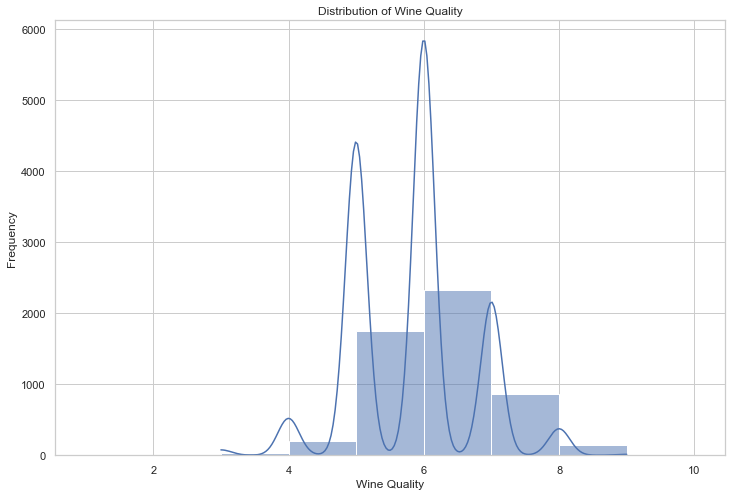

In [18]:
plt.figure(figsize=(12, 8))
sns.histplot(df['quality'], bins=range(1, 11), kde=True)
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')
plt.show()


### 2. Box Plot for Wine Quality and Various Features:

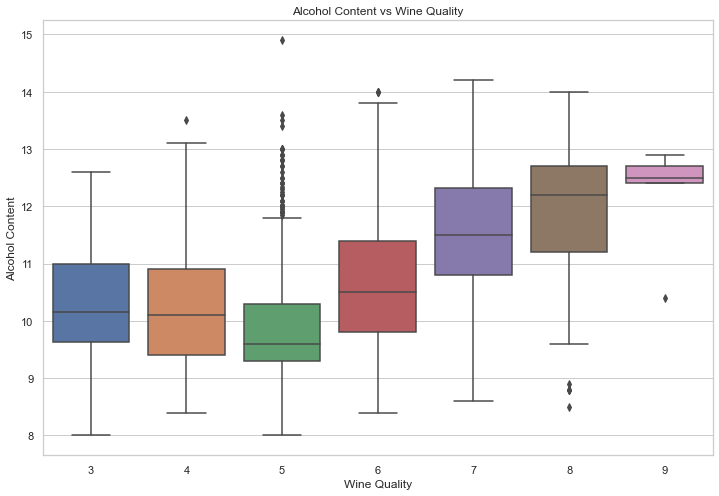

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.title('Alcohol Content vs Wine Quality')
plt.show()


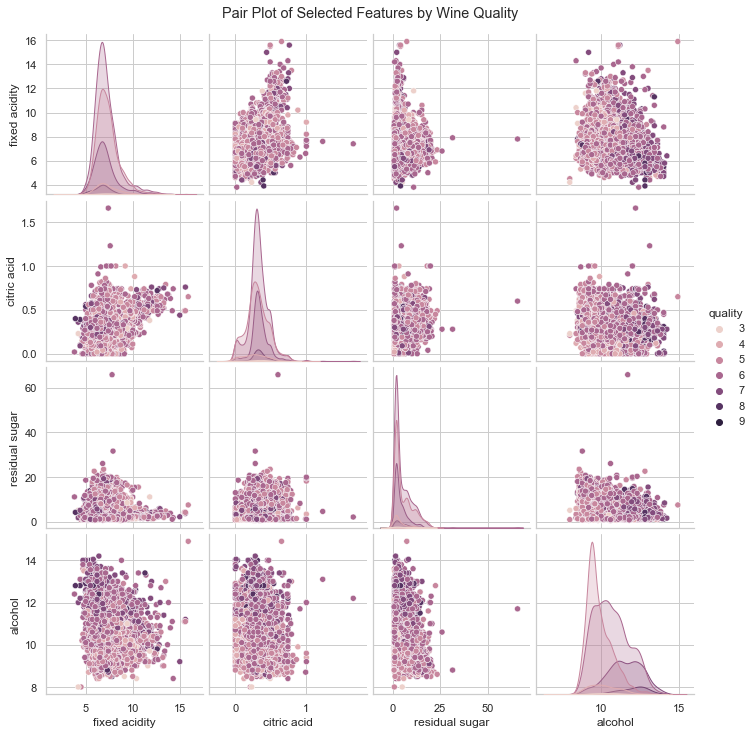

In [20]:
sns.pairplot(data=df, vars=['fixed acidity', 'citric acid', 'residual sugar', 'alcohol'], hue='quality')
plt.suptitle('Pair Plot of Selected Features by Wine Quality', y=1.02)
plt.show()


In [21]:
numerical_cols=df.select_dtypes(include = ['int64','float64'])

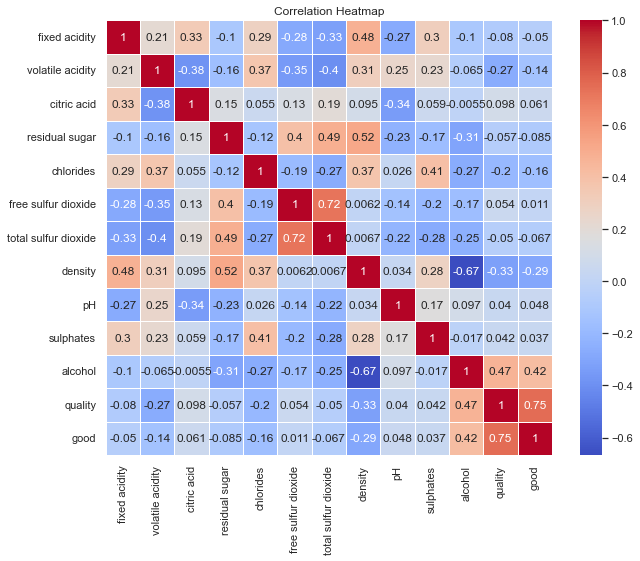

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


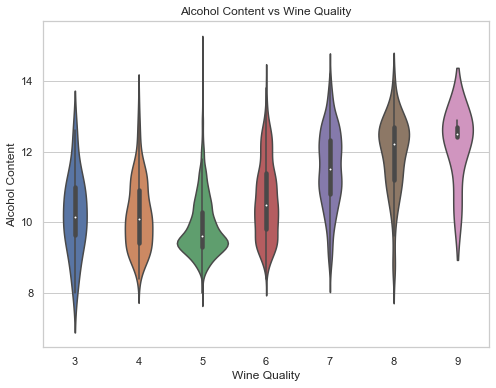

In [23]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='quality', y='alcohol', data=df)
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.title('Alcohol Content vs Wine Quality')
plt.show()


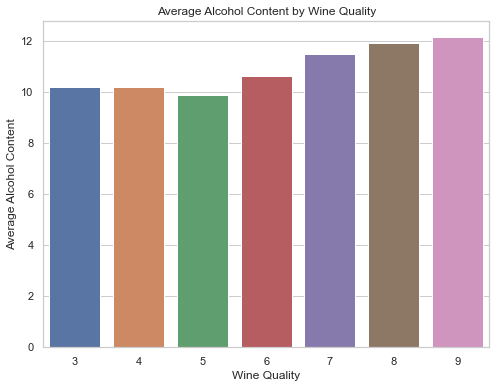

In [24]:
average_alcohol_by_quality = df.groupby('quality')['alcohol'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=average_alcohol_by_quality.index, y=average_alcohol_by_quality.values)
plt.xlabel('Wine Quality')
plt.ylabel('Average Alcohol Content')
plt.title('Average Alcohol Content by Wine Quality')
plt.show()
